In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/dario/OneDrive/Escritorio/Data sets/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


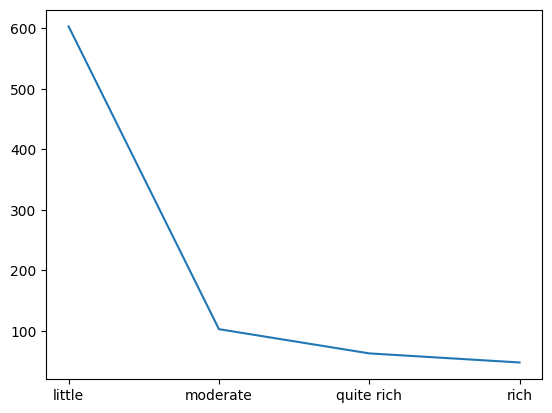

In [4]:
plt.plot(df["Saving accounts"].value_counts())
plt.show()


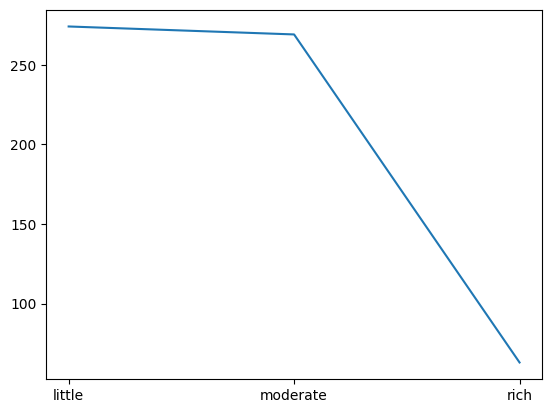

In [5]:
plt.plot(df["Checking account"].value_counts())
plt.show()

## Teniendo en cuenta la moda representada en cada columna donde había datos faltantes, se procede a rellenar dichos datos

In [6]:
df["Saving_accounts_missing_value"] = (df["Saving accounts"].isna()).astype(int)
df["Saving_checking_account_missing_value"] = (df["Checking account"].isna()).astype(int)
df["Saving accounts"].fillna("little", inplace=True)
df["Checking account"].fillna("little", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             1000 non-null   int64 
 1   Age                                    1000 non-null   int64 
 2   Sex                                    1000 non-null   object
 3   Job                                    1000 non-null   int64 
 4   Housing                                1000 non-null   object
 5   Saving accounts                        1000 non-null   object
 6   Checking account                       1000 non-null   object
 7   Credit amount                          1000 non-null   int64 
 8   Duration                               1000 non-null   int64 
 9   Purpose                                1000 non-null   object
 10  Risk                                   1000 non-null   object
 11  Saving_accounts_mi

C:\Users\dario\AppData\Local\Temp\ipykernel_16180\145593219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Saving accounts"].fillna("little", inplace=True)
C:\Users\dario\AppData\Local\Temp\ipykernel_16180\145593219.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [34]:
#Pasamos las variables categoricas a numericas con get dummies
cols = ["Housing", "Saving accounts", "Checking account", "Purpose","Risk"]
for i in cols:
    le= LabelEncoder()
    df[i] = le.fit_transform(df[i])

sex = ['Sex']
df_dummies = pd.get_dummies(df, columns=sex , drop_first=True).astype(int)
df_dummies.head()

,Unnamed: 0,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Saving_accounts_missing_value,Saving_checking_account_missing_value,Sex_male
0,0,67,2,1,0,0,1169,6,5,1,1,0,1
1,1,22,2,1,0,1,5951,48,5,0,0,0,0
2,2,49,1,1,0,0,2096,12,3,1,0,1,1
3,3,45,2,0,0,0,7882,42,4,1,0,0,1
4,4,53,2,0,0,0,4870,24,1,0,0,0,1


In [53]:
#Definimos Variables dependientes e independientes
drop = ["Risk", "Unnamed: 0"]
X = df_dummies.drop(drop, axis=1)
y = df_dummies["Risk"]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [65]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)


rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [94]:
proba = rf.predict_proba(x_test)[:,1]
y_prob = (proba >= 0.75).astype(int)
y_pred = rf.predict(x_test)
print('AUC:', roc_auc_score(y_test, proba))
print('F1:', f1_score(y_test, y_prob))
print(classification_report(y_test, y_prob))
print(accuracy_score(y_test, y_prob))

AUC: 0.7566666666666667
F1: 0.6880466472303207
              precision    recall  f1-score   support

           0       0.45      0.83      0.58        90
           1       0.89      0.56      0.69       210

    accuracy                           0.64       300
   macro avg       0.67      0.70      0.64       300
weighted avg       0.76      0.64      0.66       300

0.6433333333333333


In [95]:
proba = rf.predict_proba(x_test)[:,1]
y_prob = (proba >= 0.75).astype(int)
y_pred = rf.predict(x_test)
print('AUC:', roc_auc_score(y_test, proba))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

AUC: 0.7566666666666667
F1: 0.8405172413793104
              precision    recall  f1-score   support

           0       0.67      0.34      0.46        90
           1       0.77      0.93      0.84       210

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300

0.7533333333333333


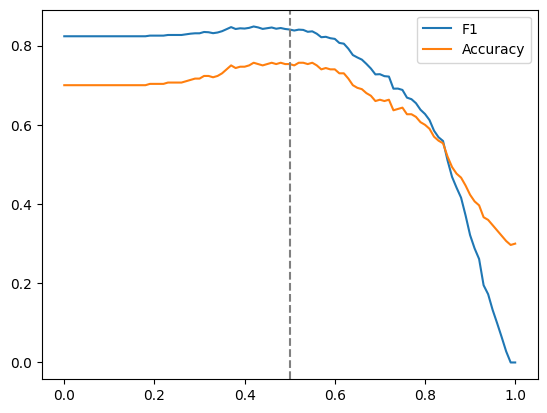

In [100]:
probas = np.arange(0.0, 1.01, 0.01)
f1_scores = [] 
acc_scores = []
proba = rf.predict_proba(x_test)[:,1]

for p in probas: 
    y_pred_umbral = (proba >= p).astype(int) 
    f1_scores.append(f1_score(y_test, y_pred_umbral)) 
    acc_scores.append(accuracy_score(y_test, y_pred_umbral)) 

plt.plot(probas, f1_scores, label='F1') 
plt.plot(probas, acc_scores, label='Accuracy') 
plt.axvline(x = 0.5, color = 'gray', linestyle = 'dashed')
plt.legend() 
plt.show()

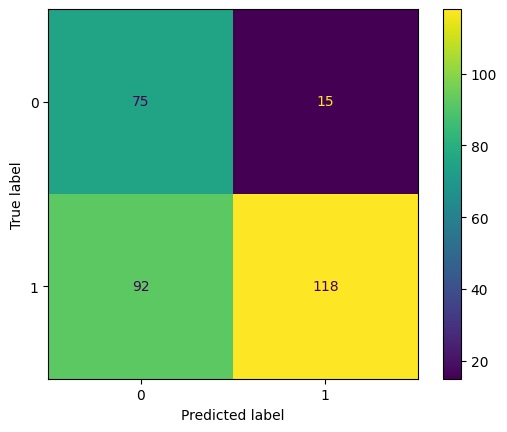

In [92]:
dm = confusion_matrix(y_test, y_prob)
ConfusionMatrixDisplay(dm).plot()
plt.show()

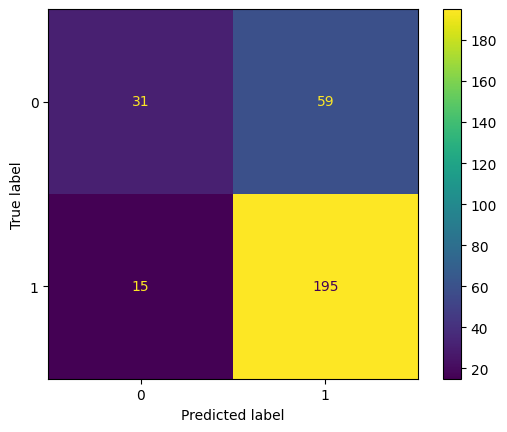

In [93]:
dm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(dm).plot()
plt.show()

In [71]:
columnas = X.columns
importancia = (rf.feature_importances_)*100
importancia_df = pd.DataFrame({'Caracteristica':columnas, 'Importancia':importancia})
importancia_df

,Caracteristica,Importancia
0,Age,15.940591
1,Job,5.165894
2,Housing,4.797470
3,Saving accounts,4.187961
4,Checking account,3.978245
5,Credit amount,23.142173
6,Duration,16.519489
7,Purpose,8.662876
8,Saving_accounts_missing_value,3.258446
9,Saving_checking_account_missing_value,11.263498


In [73]:
xgb = XGBClassifier(n_estimators = 300, max_depth = 10, learning_rate=0.1, random_state=42)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [74]:
y_prob = xgb.predict_proba(x_test)[:,1]
y_pred_xgb = xgb.predict(x_test)
print('AUC:', roc_auc_score(y_test, y_prob))
print('F1:', f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


AUC: 0.7126455026455027
F1: 0.8154897494305239
              precision    recall  f1-score   support

           0       0.56      0.44      0.50        90
           1       0.78      0.85      0.82       210

    accuracy                           0.73       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



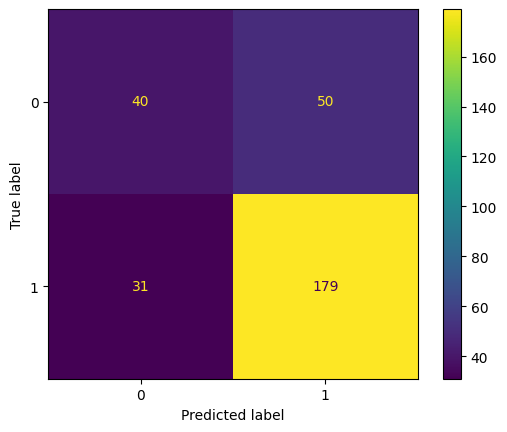

In [75]:
dm2 = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(dm2).plot()

In [76]:
plot_importance(xgb)
plt.show()

NameError: name 'plot_importance' is not defined

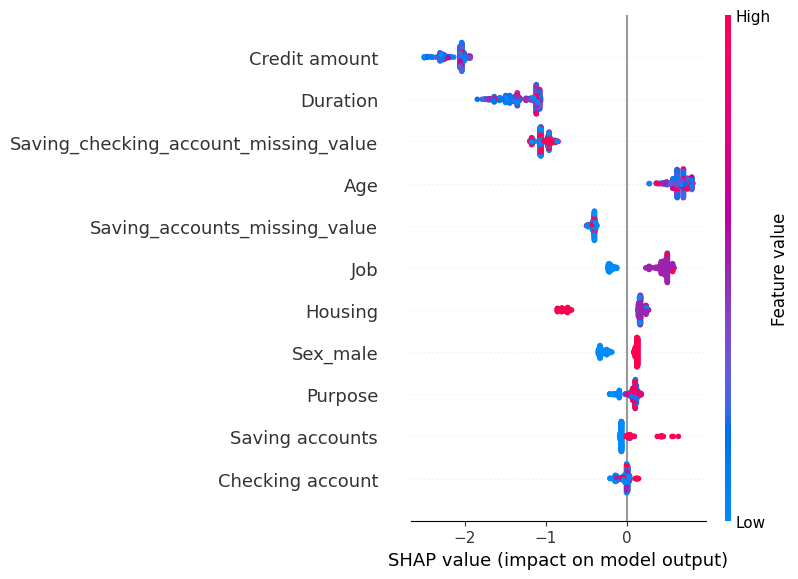

In [62]:
import shap

# 6. Interpretabilidad con SHAP 
explainer = shap.TreeExplainer(pipexgb.named_steps['xgb']) 
shap_values = explainer.shap_values(x_test) 

# Visualizar importancia de variables 
 
shap.summary_plot(shap_values, x_test)